In [1]:
import numpy   as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_excel("/Users/sundeep/Learnings/1_PGP_DSBA/Project/8_FlightPrice/Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
32h 20m      1
42h 5m       1
47h          1
5m           1
33h 45m      1
Name: Duration, Length: 368, dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(10682, 11)

In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
df['Journey_day']   = pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey,format = '%d/%m/%Y').dt.month
df['Dep_hour']      = pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min']       = pd.to_datetime(df.Dep_Time).dt.minute
df['Arrival_hour']  = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min']   = pd.to_datetime(df.Arrival_Time).dt.minute

In [9]:
Duration_hours = df['Duration'].str.split(' ', n = 2 , expand = True)
# print(Duration_hours.head())
# print(type(Duration_hours))
df["Duration_hours"]= Duration_hours[0]
df['Duration_hours'] = df['Duration_hours'].str.strip('h')

Duration_minutes = df['Duration'].str.split(' ' , n=2 , expand = True)
df['Duration_minutes'] = Duration_minutes[1]
df['Duration_minutes'] = df['Duration_minutes'].str.strip('m')

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,None
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [11]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

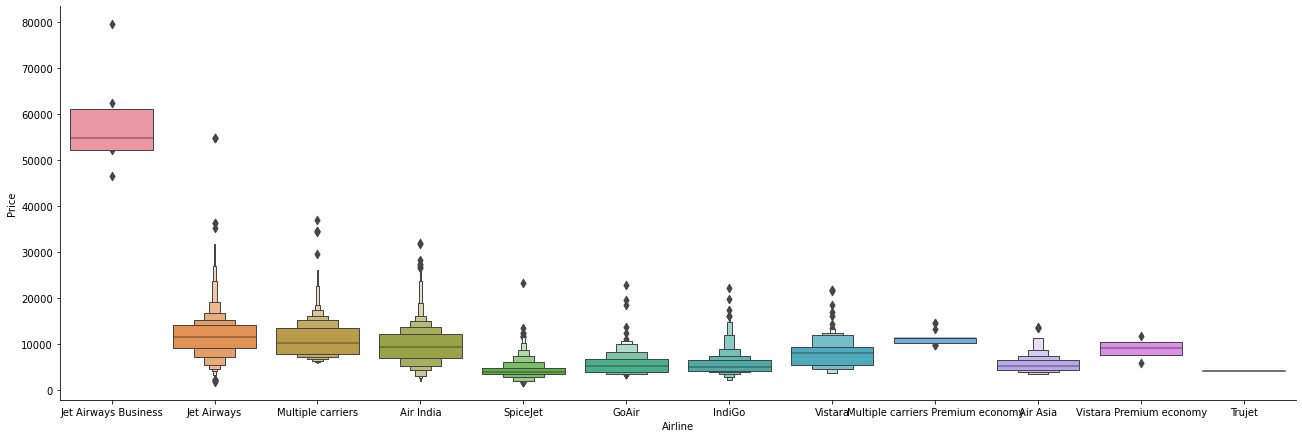

In [12]:
sns.catplot(y = 'Price',x = 'Airline' , data = df.sort_values('Price' , ascending = False) , kind = 'boxen' , height = 6 , aspect = 3)
plt.show()

In [18]:
Airline = df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [14]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

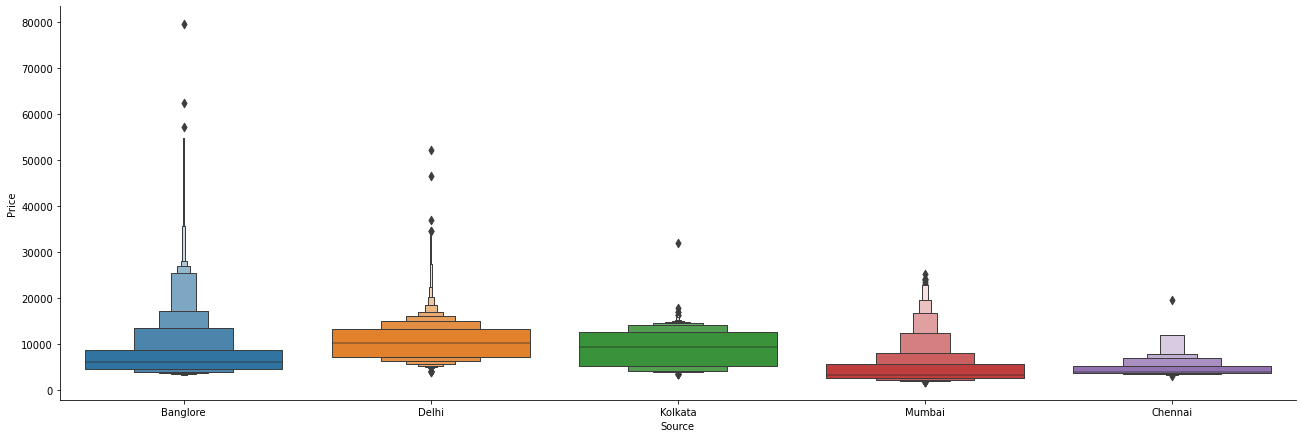

In [15]:
sns.catplot(x = 'Source', y = 'Price' , data = df.sort_values('Price' , ascending = False) , kind = 'boxen' , height = 6 , aspect = 3)

In [17]:
Source = df[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [19]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [24]:
Destination = df[['Destination']]
Destination = pd.get_dummies(Destination,drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
df['Total_Stops'] = df.replace({'non-stop' : 0 , '1 stop' : 1 , '2 stops':2 , '3 stops' : 3 , '4 stops' : 4} , inplace = True)

In [27]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Airline','Source','Destination','Route','Additional_Info'], axis = 1 , inplace = True)

In [30]:
df = pd.concat([df,Airline,Source,Destination] , axis = 1)

In [31]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,None,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,None,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,None,13882,9,6,9,25,4,25,19,None,...,0,0,1,0,0,1,0,0,0,0
3,None,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,None,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df.shape

(10682, 30)